In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

import pandas, seaborn, numpy, collections, sefara, varcode, uncertainties, numpy, statsmodels, pickle, scipy
%matplotlib inline
from matplotlib import pyplot
import topiary
import mhctools
import matplotlib_venn
import intervaltree
import statsmodels.robust
import mhcflurry
from varcode.common import memoize
pandas.set_option('display.max_columns', None)
import scipy, sys, sklearn
import sklearn.utils
import matplotlib
#import common as c
import sklearn.tree
import pymc3
from scipy import optimize
import glob


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

import pystan
import pyfaidx



/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [12]:
df = pandas.read_csv("../data/all_signatures.csv", index_col="Somatic Mutation Type")
df["Somatic Mutation Type"] = df.index
df

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin: Gallus gallus,Cyclophosphamide: Gallus gallus,Etoposide: Gallus gallus,Cisplatin: C. Elegans wildtype,Cisplatin: C. Elegans fan-1,Cisplatin: C. Elegans fcd-2,Cisplatin: C. Elegans lig-4,Cisplatin: C. Elegans lig-4; fcd-2,Cisplatin: C. Elegans mus-81,Cisplatin: C. Elegans polq-1,Cisplatin: C. Elegans slx-1,Cisplatin: C. Elegans xpf-1,Somatic Mutation Type
Somatic Mutation Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.011098,6.827082e-04,0.022172,0.0365,0.014942,0.0017,0.0004,0.036718,0.0120,0.0007,0.0002,0.0077,3.347572e-04,0.0001,0.0013,0.0161,0.001832,5.053642e-02,0.0107,1.179962e-03,0.0001,0.001504,0.000453,0.028646,0.009897,2.039773e-03,0.005206,0.001397,0.069982,0.000000,0.005651,0.005414,0.015258,0.007270,0.012589,0.007211,0.013727,0.010548,0.008637,0.017243,0.012151,0.004080,A[C>A]A
A[C>A]C,0.009149,6.191072e-04,0.017872,0.0309,0.008961,0.0028,0.0005,0.033246,0.0067,0.0010,0.0010,0.0047,6.487361e-04,0.0042,0.0040,0.0097,0.000342,1.093982e-02,0.0074,2.211505e-03,0.0007,0.002451,0.000367,0.020215,0.006999,1.487162e-03,0.004738,0.000917,0.055152,0.000000,0.103384,0.006806,0.010906,0.008788,0.009288,0.014533,0.014442,0.007777,0.010169,0.014713,0.014158,0.009058,A[C>A]C
A[C>A]G,0.001490,9.927896e-05,0.002138,0.0183,0.002208,0.0005,0.0000,0.002525,0.0005,0.0003,0.0000,0.0017,3.814459e-05,0.0005,0.0000,0.0022,0.000002,2.288073e-03,0.0005,1.616910e-07,0.0000,0.000000,0.000000,0.020479,0.001448,2.839456e-04,0.000783,0.000000,0.017847,0.001967,0.000470,0.001082,0.004453,0.001982,0.002189,0.001994,0.002041,0.001745,0.002294,0.004673,0.002019,0.001101,A[C>A]G
A[C>A]T,0.006234,3.238914e-04,0.016265,0.0243,0.009207,0.0019,0.0004,0.033599,0.0068,0.0092,0.0002,0.0046,8.466585e-04,0.0296,0.0057,0.0088,0.003180,1.942409e-02,0.0074,3.008010e-03,0.0006,0.000922,0.000000,0.024600,0.004967,5.978656e-04,0.002718,0.000513,0.026805,0.000000,0.023226,0.008658,0.007189,0.010452,0.007675,0.007051,0.011421,0.009839,0.007808,0.007463,0.007131,0.014444,A[C>A]T
A[C>G]A,0.001801,2.634810e-04,0.024003,0.0097,0.011671,0.0013,0.0000,0.008357,0.0048,0.0005,0.0007,0.0031,3.775165e-03,0.0001,0.0011,0.0048,0.001662,1.516888e-03,0.0058,6.970411e-04,0.0005,0.000528,0.000000,0.011993,0.008033,1.272881e-03,0.001324,0.000255,0.009302,0.000000,0.002740,0.003130,0.019433,0.007483,0.007893,0.012035,0.007178,0.006642,0.008388,0.007720,0.007806,0.006261,A[C>G]A
A[C>G]C,0.002581,2.698660e-04,0.012160,0.0054,0.007292,0.0012,0.0000,0.004306,0.0023,0.0003,0.0003,0.0015,9.208248e-04,0.0000,0.0001,0.0024,0.001627,2.498785e-03,0.0019,2.059310e-03,0.0008,0.000000,0.000000,0.008425,0.001636,1.528195e-03,0.001771,0.000269,0.003479,0.000000,0.002237,0.002275,0.004400,0.008499,0.009774,0.008508,0.008896,0.007727,0.009845,0.014841,0.009223,0.004701,A[C>G]C
A[C>G]G,0.000593,2.192339e-04,0.005275,0.0031,0.002304,0.0000,0.0000,0.000584,0.0000,0.0000,0.0000,0.0000,1.989049e-05,0.0000,0.0006,0.0000,0.000026,2.614509e-03,0.0000,1.273496e-05,0.0000,0.000000,0.000000,0.000000,0.000000,3.072463e-04,0.000000,0.000000,0.000154,0.004820,0.000318,0.001054,0.004832,0.002008,0.002158,0.001978,0.001972,0.001759,0.002270,0.002143,0.002030,0.001690,A[C>G]G
A[C>G]T,0.002964,6.109735e-04,0.023278,0.0054,0.011696,0.0018,0.0001,0.008635,0.0038,0.0002,0.0009,0.0025,3.860632e-03,0.0001,0.0010,0.0073,0.001329,3.983011e-03,0.0072,8.485871e-04,0.0018,0.000299,0.000000,0.003881,0.003428,2.498252e-03,0.001323,0.000308,0.003977,0.000000,0.003925,0.003545,0.010046,0.011980,0.007420,0.006884,0.006787,0.006212,0.008088,0.011951,0.007341,0.006130,A[C>G]T
A[C>T]A,0.029515,7.441557e-03,0.017872,0.0120,0.021839,0.0312,0.0

In [6]:
signatures_to_plot = [x for x in df.columns if 'Signature' not in x]
signatures_to_plot

['Cisplatin: Gallus gallus',
 'Cyclophosphamide: Gallus gallus',
 'Etoposide: Gallus gallus',
 'Cisplatin: C. Elegans wildtype',
 'Cisplatin: C. Elegans fan-1',
 'Cisplatin: C. Elegans fcd-2',
 'Cisplatin: C. Elegans lig-4',
 'Cisplatin: C. Elegans lig-4; fcd-2',
 'Cisplatin: C. Elegans mus-81',
 'Cisplatin: C. Elegans polq-1',
 'Cisplatin: C. Elegans slx-1',
 'Cisplatin: C. Elegans xpf-1']

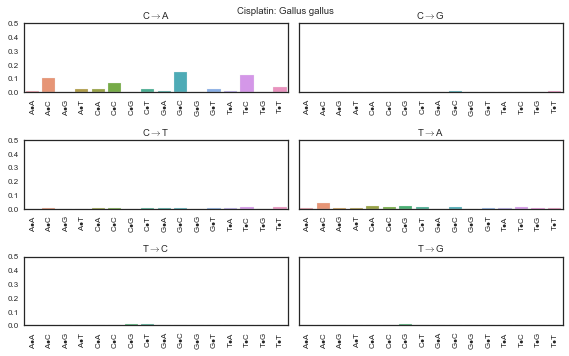

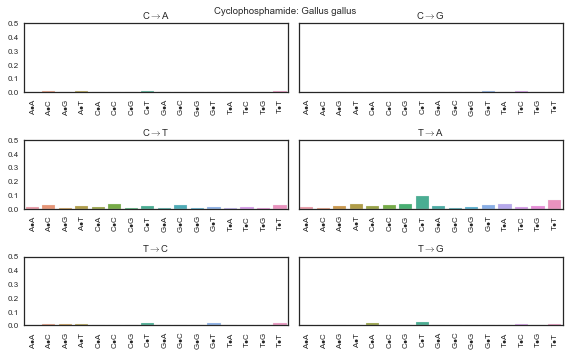

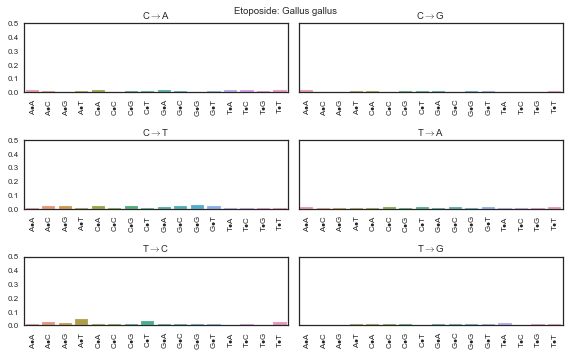

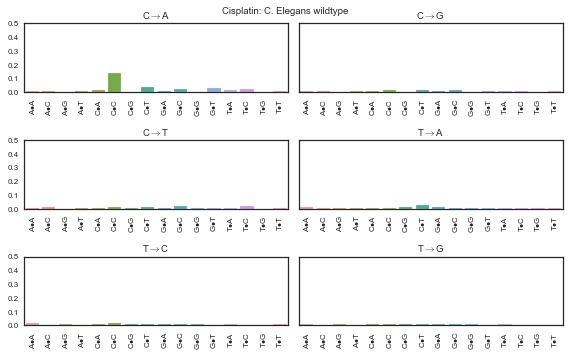

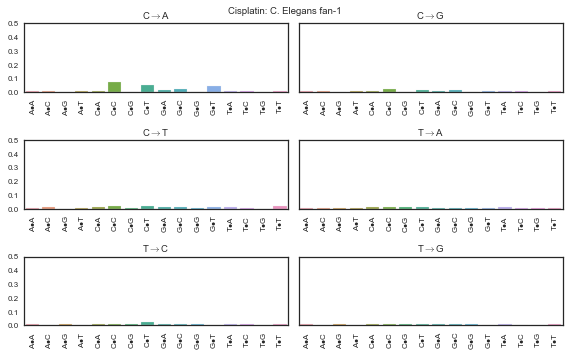

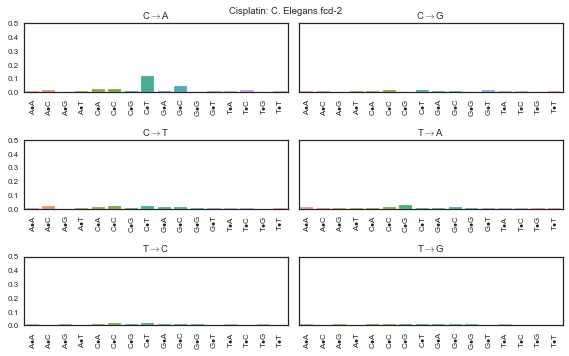

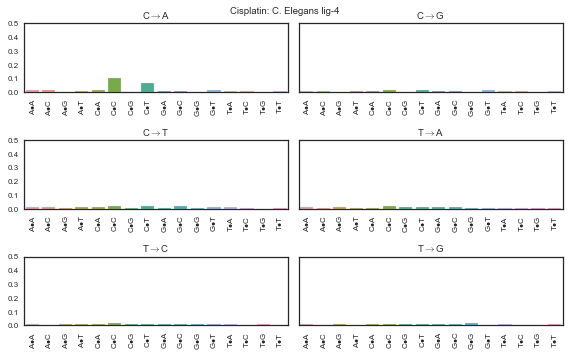

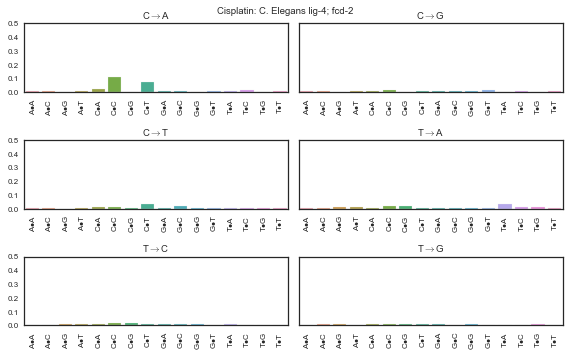

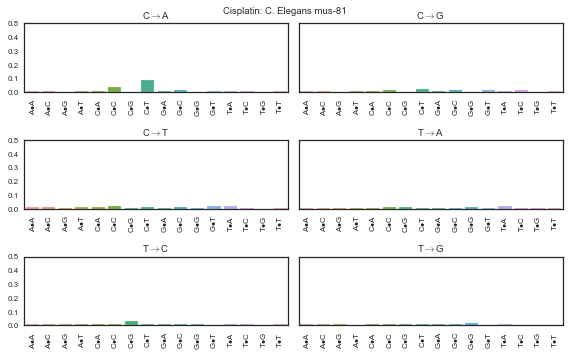

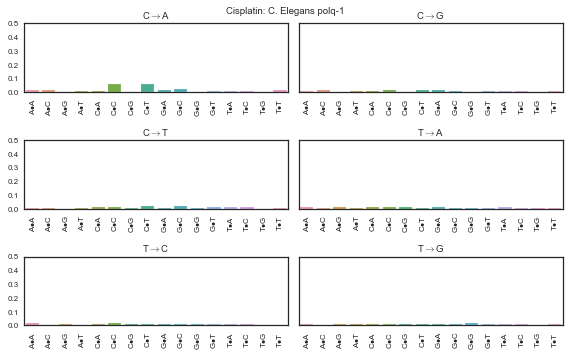

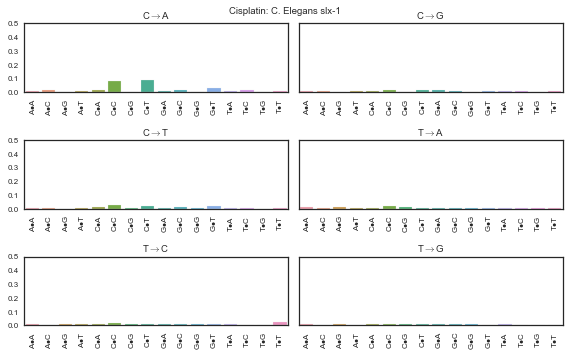

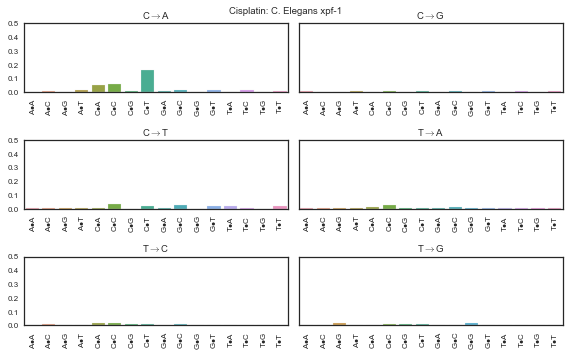

In [27]:
for signature in signatures_to_plot:
    seaborn.set_context('paper')
    seaborn.set_style("white")
    pyplot.figure(figsize=(8,5))

    grid=(3,2)
    positions = []
    for row in range(grid[0]):
        for col in range(grid[1]):
            positions.append((row, col))

    prev_axes = []
    for ((row, col), kind) in zip(positions, sorted(set(df.index.str.slice(2,5)))):
        sharex = sharey = None
        if col > 1:
            sharey = prev_axes[-1]
        if row != 0:
            sharex = prev_axes[-grid[1]]

        ax = pyplot.subplot2grid(grid, (row, col), sharex=sharex, sharey=sharey)
        prev_axes.append(ax)

        sub_df = df[df.index.str.contains(kind)]

        seaborn.barplot(ax=ax,
                        data=sub_df,
                        y=signature,
                        x="Somatic Mutation Type")
        pyplot.xticks(numpy.arange(sub_df.shape[0]), [x.replace("[%s]" % kind, r"$\bullet$") for x in sub_df.index])
        pyplot.xticks(rotation=90)
        pyplot.ylabel("")
        pyplot.xlabel("")
        pyplot.title(kind.replace(">", "$\\rightarrow$"))
        pyplot.ylim(ymin=0, ymax=0.5)
        #ax.xaxis.grid('on')

        #ax.label_outer()
        for label in ax.get_yticklabels():
            label.set_visible(ax.is_first_col())

    pyplot.suptitle(signature)
    pyplot.tight_layout()
